In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xlsxwriter
from shapely.geometry import Point, Polygon
import seaborn as sns

In [26]:

# taken from https://data.humdata.org/dataset/cod-ab-phl
fp = ".\Data\Shapefiles\Philippines\phl_admbnda_adm2_psa_namria_20200529.shp"
map_df = gpd.read_file(fp)
map_df.columns
#map_df = map_df[['ADM2_EN', 'geometry']]
#map_df.Shape_Area

Index(['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1EN', 'ADM2ALT2EN', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN',
       'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')

In [27]:
# Data for Solar Potential Heatmap
datafp = '.\Data\SolarPotential\Philippine_regions_pvpotential.csv'
solar_potential_data = gpd.read_file(datafp)
solar_potential_data = solar_potential_data[["ADM2_EN", "avg_specific_pv_output"]]
solar_potential_data.avg_specific_pv_output = pd.to_numeric(solar_potential_data.avg_specific_pv_output, errors='coerce')

merged_solar = map_df.set_index("ADM2_EN").join(solar_potential_data.set_index("ADM2_EN"))
variable_solar = "avg_specific_pv_output"

In [28]:
map_df.geometry.head()

0    POLYGON ((120.96109 17.95348, 120.97201 17.946...
1    MULTIPOLYGON (((125.58886 9.45793, 125.59687 9...
2    POLYGON ((125.88961 8.98195, 125.88896 8.96446...
3    MULTIPOLYGON (((122.43980 11.59717, 122.43979 ...
4    MULTIPOLYGON (((124.20992 13.16871, 124.20993 ...
Name: geometry, dtype: geometry

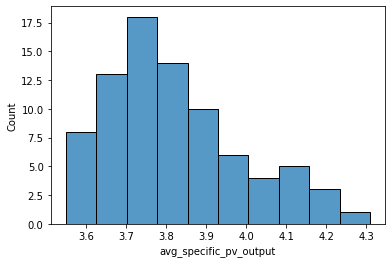

In [29]:
ax = sns.histplot(data=merged_solar, x ='avg_specific_pv_output', bins = 10)

In [30]:
# PowerPlants
powerplantsfp = '.\Data\PowerPlants\global_power_plant_database.csv'
powerplants = pd.read_csv(powerplantsfp)
powerplants = powerplants[powerplants.country_long == 'Philippines']
powerplants = powerplants[powerplants.primary_fuel == 'Solar']
powerplants.capacity_mw = pd.to_numeric(powerplants.capacity_mw, errors='coerce')
crs = {'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(powerplants["longitude"], powerplants["latitude"])]
geodata=gpd.GeoDataFrame(powerplants,crs=crs, geometry=geometry)

#fig, ax = plt.subplots(figsize=(20,20))

C:\Users\rayno\AppData\Local\Temp\ipykernel_11256\1912020298.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  powerplants = pd.read_csv(powerplantsfp)
C:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

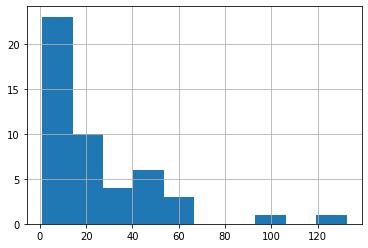

In [31]:
powerplants.capacity_mw.hist()

In [32]:
powerplants[variable_solar] = None
powerplants[variable_solar+"_bin"] = None
powerplants.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,avg_specific_pv_output,avg_specific_pv_output_bin
18321,PHL,Philippines,Armenia Solar,WRI1029964,8.8,15.4605,120.5918,Solar,NaN,NaN,...,NaN,15.43,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.59180 15.46050),None,None
18341,PHL,Philippines,Burgos,WKS0065263,4.1,18.5280,120.6378,Solar,NaN,NaN,...,7.62,7.57,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.63780 18.52800),None,None
18349,PHL,Philippines,CW Home Depot Solar,WRI1030484,1.7,14.2666,121.0790,Solar,NaN,NaN,...,NaN,2.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (121.07900 14.26660),None,None
18350,PHL,Philippines,Cabanatuan Solar,WRI1023900,10.3,15.4968,120.9921,Solar,NaN,NaN,...,NaN,18.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.99210 15.49680),None,None
18352,PHL,Philippines,Calatagan Solar,WRI1023901,63.3,13.9155,120.6498,Solar,NaN,NaN,...,NaN,127.73,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.64980 13.91550),None,None


In [33]:
merged_solar.head()

,Shape_Leng,Shape_Area,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,avg_specific_pv_output
ADM2_EN,,,,,,,,,,,,,,,
Abra,2.640967,0.334223,PH140100000,None,None,None,Cordillera Administrative Region,PH140000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((120.96109 17.95348, 120.97201 17.946...",4.16
Agusan del Norte,3.674955,0.220065,PH160200000,None,None,None,Region XIII,PH160000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((125.58886 9.45793, 125.59687 9...",3.55
Agusan del Sur,5.222636,0.693968,PH160300000,None,None,None,Region XIII,PH160000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"POLYGON ((125.88961 8.98195, 125.88896 8.96446...",3.69
Aklan,4.626091,0.139664,PH060400000,None,None,None,Region VI,PH060000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((122.43980 11.59717, 122.43979 ...",3.62
Albay,6.507665,0.205939,PH050500000,None,None,None,Region V,PH050000000,Philippines (the),PH,2016-06-30,2020-05-29,None,"MULTIPOLYGON (((124.20992 13.16871, 124.20993 ...",3.78


In [34]:
merged_solar.Shape_Area.head()

ADM2_EN
Abra                0.334223
Agusan del Norte    0.220065
Agusan del Sur      0.693968
Aklan               0.139664
Albay               0.205939
Name: Shape_Area, dtype: float64

In [35]:
for index, entry in powerplants.iterrows():
    a = merged_solar.geometry.contains(entry['geometry'])
    a = a[a == True]
    powerplants[variable_solar][index] = merged_solar.loc[a.index.array[0]][variable_solar]
    #powerplants[variable_solar+"bin"] = 
    #print(a.index.array[0], merged_solar.loc[a.index.array[0]][variable_solar])

C:\Users\rayno\AppData\Local\Temp\ipykernel_11256\2434594828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplants[variable_solar][index] = merged_solar.loc[a.index.array[0]][variable_solar]


In [36]:
powerplants

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,avg_specific_pv_output,avg_specific_pv_output_bin
18321,PHL,Philippines,Armenia Solar,WRI1029964,8.8,15.4605,120.5918,Solar,NaN,NaN,...,NaN,15.43,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.59180 15.46050),4.18,None
18341,PHL,Philippines,Burgos,WKS0065263,4.1,18.5280,120.6378,Solar,NaN,NaN,...,7.62,7.57,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.63780 18.52800),4.13,None
18349,PHL,Philippines,CW Home Depot Solar,WRI1030484,1.7,14.2666,121.0790,Solar,NaN,NaN,...,NaN,2.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (121.07900 14.26660),3.83,None
18350,PHL,Philippines,Cabanatuan Solar,WRI1023900,10.3,15.4968,120.9921,Solar,NaN,NaN,...,NaN,18.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.99210 15.49680),4.08,None
18352,PHL,Philippines,Calatagan Solar,WRI1023901,63.3,13.9155,120.6498,Solar,NaN,NaN,...,NaN,127.73,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.64980 13.91550),3.96,None
18354,PHL,Philippines,Cavite,WKS0061756,3.0,14.4200,120.8800,Solar,NaN,NaN,...,5.65,5.45,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.88000 14.42000),3.97,None
18355,PHL,Philippines,Cavite Economic,WKS0065747,41.3,14.4170,120.8750,Solar,NaN,NaN,...,83.86,77.79,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.87500 14.41700),3.97,None
18356,PHL,Philippines,Centrala,WKS0062351,6.2,6.3338,124.7444,Solar,NaN,NaN,...,12.19,10.92,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (124.74440 6.33380),3.72,None
18357,PHL,Philippines,Clark Solar,WRI1023905,22.3,15.0736,120.5893,Solar,NaN,NaN,...,NaN,41.11,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.58930 15.07360),4.11,None
18358,PHL,Philippines,Concepcion,WKS0065447,100.0,15.3350,120.6950,Solar,NaN,NaN,...,190.63,184.92,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.69500 15.33500),4.18,None


In [37]:
a = pd.cut(powerplants.avg_specific_pv_output,5)
a.head()

18321     (4.174, 4.31]
18341    (4.038, 4.174]
18349    (3.766, 3.902]
18350    (4.038, 4.174]
18352    (3.902, 4.038]
Name: avg_specific_pv_output, dtype: category
Categories (5, interval[float64, right]): [(3.629, 3.766] < (3.766, 3.902] < (3.902, 4.038] < (4.038, 4.174] < (4.174, 4.31]]

In [38]:
powerplants.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,avg_specific_pv_output,avg_specific_pv_output_bin
18321,PHL,Philippines,Armenia Solar,WRI1029964,8.8,15.4605,120.5918,Solar,NaN,NaN,...,NaN,15.43,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.59180 15.46050),4.18,None
18341,PHL,Philippines,Burgos,WKS0065263,4.1,18.5280,120.6378,Solar,NaN,NaN,...,7.62,7.57,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (120.63780 18.52800),4.13,None
18349,PHL,Philippines,CW Home Depot Solar,WRI1030484,1.7,14.2666,121.0790,Solar,NaN,NaN,...,NaN,2.30,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (121.07900 14.26660),3.83,None
18350,PHL,Philippines,Cabanatuan Solar,WRI1023900,10.3,15.4968,120.9921,Solar,NaN,NaN,...,NaN,18.96,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.99210 15.49680),4.08,None
18352,PHL,Philippines,Calatagan Solar,WRI1023901,63.3,13.9155,120.6498,Solar,NaN,NaN,...,NaN,127.73,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,SOLAR-V1,POINT (120.64980 13.91550),3.96,None


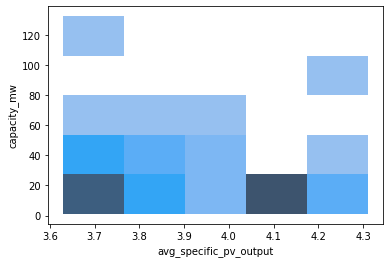

In [39]:
ax = sns.histplot(x=variable_solar, y="capacity_mw", data=powerplants, bins=5)

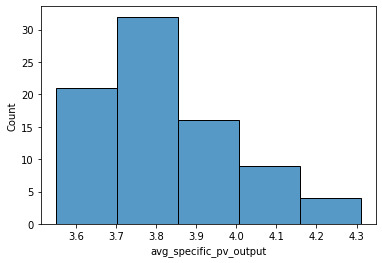

In [40]:
a = sns.histplot(x=variable_solar, data=merged_solar, bins=5)

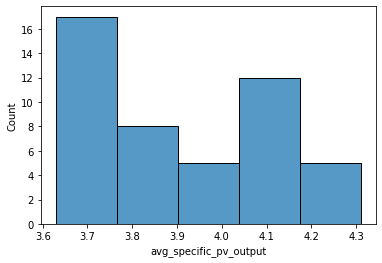

In [41]:
b = sns.histplot(data=powerplants, x=variable_solar, bins=5)

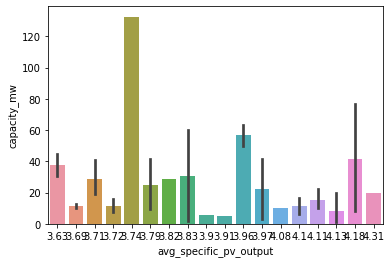

In [42]:
ax = sns.barplot(x=variable_solar, y="capacity_mw", data=powerplants)

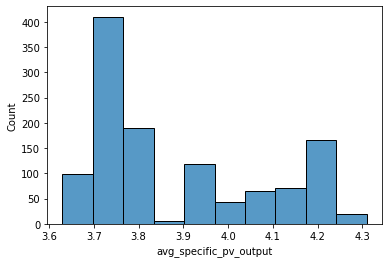

In [48]:
ax = sns.histplot(x=variable_solar, weights="capacity_mw", data=powerplants, bins=10)

C:\Users\rayno\AppData\Local\Temp\ipykernel_11256\1662637596.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  powerplants = pd.read_csv(powerplantsfp)
C:\Program Files\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(255.09060963700347, 0.5, 'Latitude')

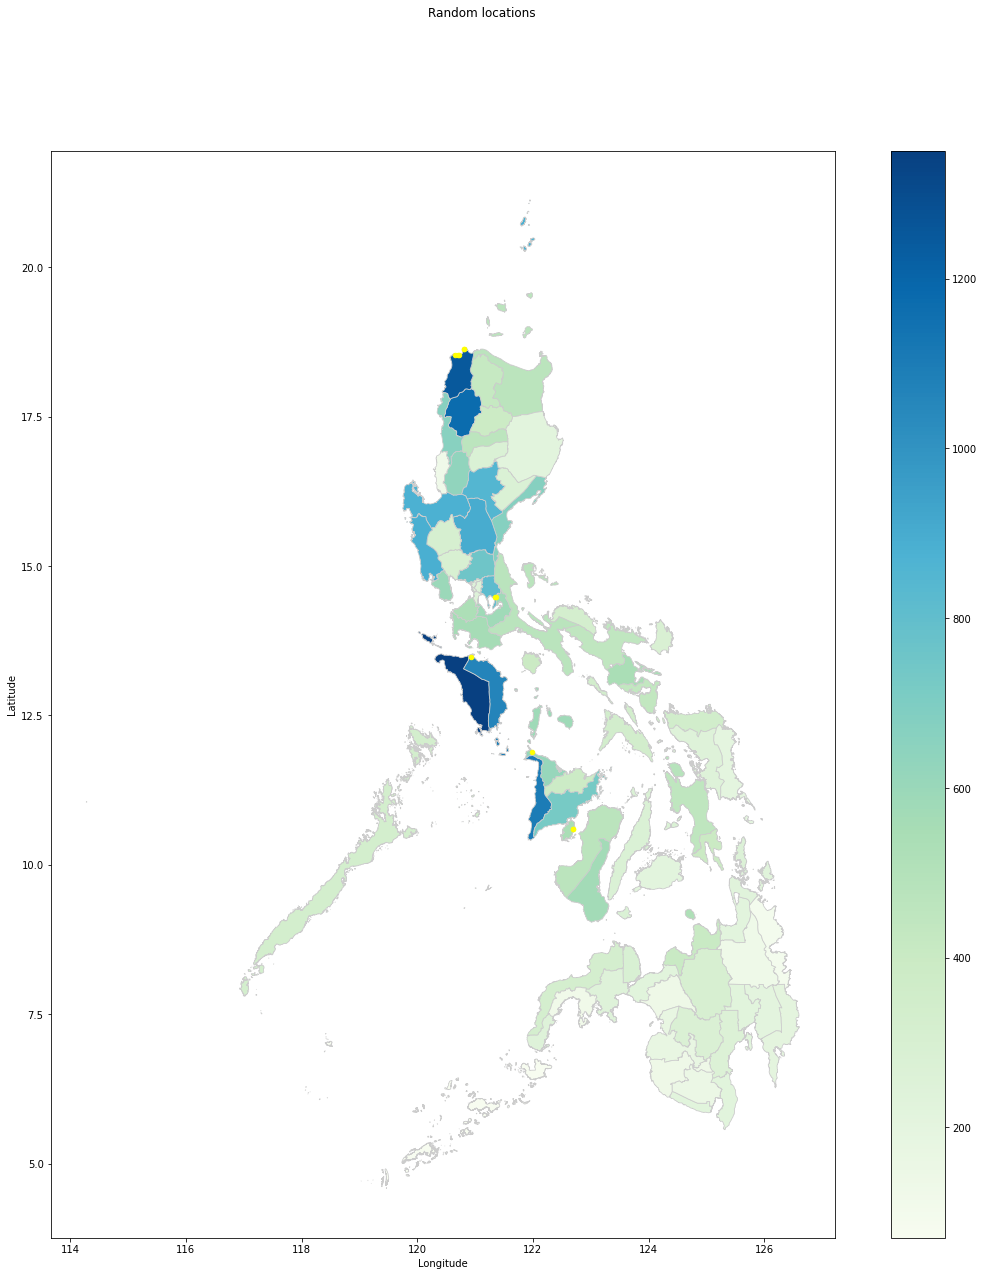

In [19]:
# PowerPlants
powerplantsfp = '.\Data\PowerPlants\global_power_plant_database.csv'
powerplants = pd.read_csv(powerplantsfp)
powerplants = powerplants[powerplants.country_long == 'Philippines']
powerplants = powerplants[powerplants.primary_fuel == 'Wind']
powerplants.capacity_mw = pd.to_numeric(powerplants.capacity_mw, errors='coerce')
crs = {'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(powerplants["longitude"], powerplants["latitude"])]
geodata=gpd.GeoDataFrame(powerplants,crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(20,20))

# Data for Wind Potential Heatmap
datafp = '.\Data\WindPotential\Philippine_regions_windpotential.csv'
wind_potential_data = gpd.read_file(datafp)
wind_potential_data = wind_potential_data[["ADM2_EN", "mean_power_density"]]
wind_potential_data.mean_power_density = pd.to_numeric(wind_potential_data.mean_power_density, errors='coerce')

merged_wind = map_df.set_index("ADM2_EN").join(wind_potential_data.set_index("ADM2_EN"))
variable_wind = "mean_power_density"

merged_wind.plot(column=variable_wind, cmap="GnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
geodata.plot(ax=ax, color='yellow', markersize=20)

fig.suptitle('Random locations', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')


In [20]:
powerplants[variable_wind] = None
powerplants[variable_wind+"_bin"] = None       # IMPLEMENT BIN

count = 0
for index, entry in powerplants.iterrows():
    a = merged_wind.geometry.contains(entry['geometry'])
    a = a[a == True]
    i = a.index.array
    if len(i) > 0:
        powerplants[variable_wind][index] = merged_wind.loc[a.index.array[0]][variable_wind]
        count +=1
    else:
        print(entry['geometry'])
    #print(a.index.array)
print(count)


C:\Users\rayno\AppData\Local\Temp\ipykernel_11256\2444554465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  powerplants[variable_wind][index] = merged_wind.loc[a.index.array[0]][variable_wind]


11


In [21]:
powerplants

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,mean_power_density,mean_power_density_bin
18326,PHL,Philippines,BANGUI WIND POWER,WRI1001906,33.0,18.525685,120.715568,Wind,NaN,NaN,...,NaN,84.53,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (120.71557 18.52568),1246.0,None
18327,PHL,Philippines,Burgos Wind Farm,NaN,150.0,18.534442,120.648899,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.64890 18.53444),1246.0,None
18328,PHL,Philippines,Mindoro Wind Farm,NaN,48.0,13.479663,120.927855,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.92785 13.47966),1061.0,None
18329,PHL,Philippines,Caparispisan Wind Farm,NaN,81.0,18.624997,120.810864,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.81086 18.62500),1246.0,None
18330,PHL,Philippines,Balaoi and Caunayan Wind Farm,NaN,160.0,18.628026,120.810709,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.81071 18.62803),1246.0,None
18331,PHL,Philippines,San Lorenzo Wind Farm,NaN,54.0,10.591787,122.692313,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (122.69231 10.59179),545.0,None
18332,PHL,Philippines,Sibunag Wind Farm,NaN,40.0,10.601293,122.694571,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (122.69457 10.60129),545.0,None
18333,PHL,Philippines,Pililla Wind Farm,NaN,54.0,14.473708,121.349032,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.34903 14.47371),817.0,None
18334,PHL,Philippines,Nabas Wind Farm,NaN,36.0,11.879727,121.985874,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.98587 11.87973),612.0,None
18335,PHL,Philippines,Sembrano Wind Farm,NaN,72.0,14.472515,121.367119,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (121.36712 14.47252),580.0,None


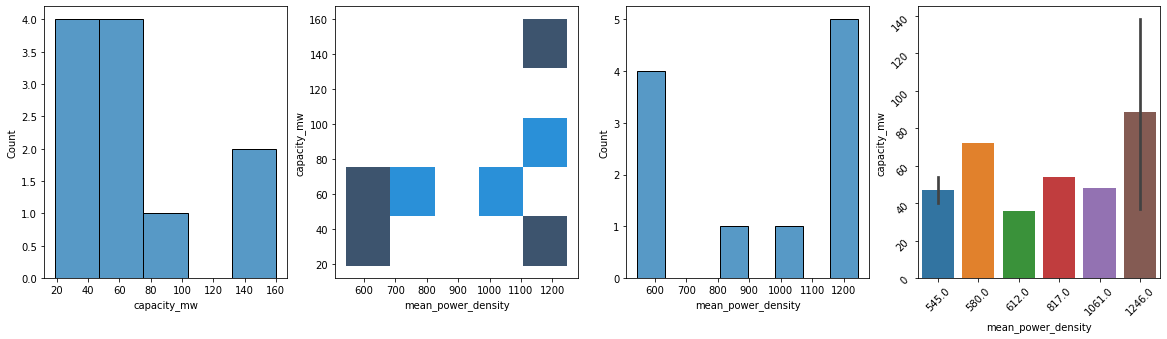

In [22]:
fig, (h1,h2,h3,h4) = plt.subplots(1,4, figsize=(20, 5))
sns.histplot(x='capacity_mw', data=powerplants, ax=h1)
sns.histplot(x=variable_wind, y="capacity_mw", data=powerplants, bins=5, ax=h2)
sns.histplot(data=powerplants, x=variable_wind, bins=8, ax=h3)
sns.barplot(x=variable_wind, y="capacity_mw", data=powerplants, ax=h4)
h4.tick_params(labelrotation=45)

<AxesSubplot:xlabel='mean_power_density', ylabel='Count'>

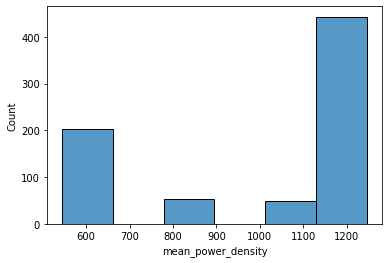

In [23]:
sns.histplot(x=variable_wind,data=powerplants,weights='capacity_mw', bins=6)

<AxesSubplot:xlabel='mean_power_density', ylabel='Count'>

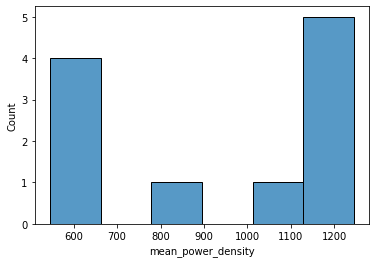

In [24]:
sns.histplot(x=variable_wind,data=powerplants, bins=6)